In [1]:
#This regression model has numerical colums and binary columns (previously categorical), this model  is the second most 
# accurate regression model by a small margin,

#This variant has the 'cancellation policy' & 'bathrooms' & 'minimum nights' columns deleted

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)    #removes all red warnings

class color:           # lets me bold text
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#loading the dataset
dataset = pd.read_csv('AirbnbMNdata-Regression.csv')

#Splitting into binary categories
dataset["neighbourhood_cleansed"] = dataset["neighbourhood_cleansed"].replace(['Ramsey','Hennepin'],'high_density')
dataset["neighbourhood_cleansed"] = dataset["neighbourhood_cleansed"].replace(
    ['Anoka','Dakota','Washington','Scott','Carver','Sherburne','Wright','Chisago','St. Croix','Isanti','Sibley','Le Sueur','Mille Lacs','Pierce'],'low_density')
dataset["property_type"] = dataset["property_type"].replace(['Apartment','Barn','Bed and breakfast','Bungalow','Boat',
    'Boutique hotel','Campsite','Cabin','Camper/RV','Chalet','Cottage','Condominium','Earth house','Dome house','Farm stay',
    'Guest suite','Guesthouse','Hostel','Hotel','Houseboat','Island','Loft','Nature lodge','Plane','Resort','Serviced apartment',
    'Tiny house','Treehouse','Townhouse','Yurt','Castle','Other','Villa'],"everything_but_house")    #Simplifies property type category house vs nonhouse
dataset["room_type"] = dataset["room_type"].replace(['Hotel room','Shared room','Private room'],'other')
dataset = dataset.drop(['cancellation_policy','minimum_nights','bathrooms'],axis=1)
print("Dataset before drop:", dataset.shape)

dataset = dataset.dropna(axis=0)     # Most of the dropped rows are from the Review Scores Rating
print("Dataset after drop:", dataset.shape)

X = dataset.values
X = np.delete(X,9, axis = 1)
y = dataset.iloc[:,9].values
print("X:", X.shape)
print("y:", y.shape)
print(color.BOLD+"X column values:"+color.END, X[0,:])

#Dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 
labelencoder_X = LabelEncoder() 
X[:,0] = labelencoder_X.fit_transform(X[:,0])
X[:,2] = labelencoder_X.fit_transform(X[:,2])
X[:,3] = labelencoder_X.fit_transform(X[:,3])
X[:,4] = labelencoder_X.fit_transform(X[:,4])
X[:,5] = labelencoder_X.fit_transform(X[:,5])
X[:,12] = labelencoder_X.fit_transform(X[:,12])
onehotencoder = OneHotEncoder(categorical_features=[0]) 
X = onehotencoder.fit_transform(X).toarray()
# Removing the extra dummy variable 
X = X[:, 1:]
print("X shape:", X.shape)
print("y type:", type(y[0]), (y[0]+y[1]))
print(color.BOLD+"X column values:"+color.END, X[0,:])

#Backward Elimination 
import statsmodels.api as sm
X = np.append(arr=np.ones((4268,1)).astype(int), values=X, axis=1)

X_sig = X[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]] 
X_sig = X[:,[0,1,2,3,4,6,7,8,9,10,11,12,13]]     # Removed #5 (property type)
X_sig = X[:,[0,1,2,3,4,6,8,9,10,11,12,13]]     # Removed #7 (accommodates)

obj_OLS = sm.OLS(endog = y, exog = X_sig).fit() 
obj_OLS.summary()

print("X_sig shape:", X_sig.shape)
print(color.BOLD+"Columns that are kept:\n"+color.END,dataset.iloc[0,[0,1,2,3,5,7,8,9,10,11,12,13]])
print(color.BOLD+"Columns that are deleted:\n"+color.END,dataset.iloc[0,[4,6]])

Dataset before drop: (6711, 14)
Dataset after drop: (4268, 14)
X: (4268, 13)
y: (4268,)
X column values: ['t' 3 't' 'high_density' 'House' 'Entire home/apt' 5 1.0 1.0 200.0 120
 228 'f']


D:\Python\Anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


X shape: (4268, 13)
y type: <class 'numpy.int64'> 235
X column values: [  1.   3.   1.   0.   0.   0.   5.   1.   1. 200. 120. 228.   0.]
X_sig shape: (4268, 12)
Columns that are kept:
 host_is_superhost                          t
host_total_listings_count                  3
host_identity_verified                     t
neighbourhood_cleansed          high_density
room_type                    Entire home/apt
bedrooms                                   1
beds                                       1
price                                     85
security_deposit                         200
maximum_nights                           120
number_of_reviews                        228
instant_bookable                           f
Name: 0, dtype: object
Columns that are deleted:
 property_type    House
accommodates         5
Name: 0, dtype: object


In [2]:
#this tells counts how many instances there are per category
dataset.property_type .value_counts().sort_index()

House                   2448
everything_but_house    1820
Name: property_type, dtype: int64

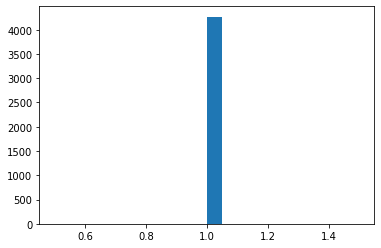

In [3]:
# Check for skewness amonst continuous data
plt.hist(X_sig[:,0], bins = 20, align='mid')
plt.show()

In [2]:
#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

In [3]:
#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[2,6,7,8,9,10]] = sc_X.fit_transform(X_train[:,[2,6,7,8,9,10]])
X_test[:,[2,6,7,8,9,10]] = sc_X.transform(X_test[:,[2,6,7,8,9,10]])      #These are all skewed columns
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2987, 12) (1281, 12) (2987,) (1281,)


In [4]:
#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())


#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=55,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())

Multiple Linear Regression
K-Fold Model Accuracy: 0.349
K-Fold Model Std: 0.080
Random Forest
K-Fold Model Accuracy: 0.530
K-Fold Model Std: 0.093


In [7]:
#######################################  Apply PCA  ################################################

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[2,6,7,8,9,10]] = sc_X.fit_transform(X_train[:,[2,6,7,8,9,10]])
X_test[:,[2,6,7,8,9,10]] = sc_X.transform(X_test[:,[2,6,7,8,9,10]]) 

#Applying PCA
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=8,random_state=0)       #Uses 8 components
X_train = pcaObj.fit_transform(X_train)
X_test = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_


print('X_train shape after PCA: ', X_train.shape)

X_train shape after PCA:  (2987, 8)


In [8]:
#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())


#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=55,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())

Multiple Linear Regression
K-Fold Model Accuracy: 0.349
K-Fold Model Std: 0.081
Random Forest
K-Fold Model Accuracy: 0.402
K-Fold Model Std: 0.142


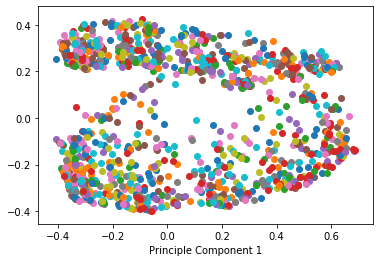

X_train shape after Kernel PCA:  (2987, 33)


In [9]:
#######################################  Apply Kernel PCA  ################################################

#Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

#Normalizing all features that are skewed
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train[:,[2,6,7,8,9,10]] = sc_X.fit_transform(X_train[:,[2,6,7,8,9,10]])
X_test[:,[2,6,7,8,9,10]] = sc_X.transform(X_test[:,[2,6,7,8,9,10]])

#kernel PCA
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=33, kernel='rbf',remove_zero_eig=True,random_state=0)  # I obtained 33 using for loop
X_train = kernelPCAObj.fit_transform(X_train)
X_test = kernelPCAObj.transform(X_test)

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                cmap='jet', label = j)
plt.xlabel('Principle Component 1')
plt.ylabel('')
plt.show()
print('X_train shape after Kernel PCA: ', X_train.shape)

In [10]:
#######################################  Multiple Linear Regression  ################################################

print(color.BOLD+'Multiple Linear Regression'+color.END)
#Fitting Multiple Linear Regression to Training Set 
from sklearn.linear_model import LinearRegression 
mlrObj = LinearRegression() 
mlrObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=mlrObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())


#######################################  Random Forest  ################################################

print(color.BOLD+'Random Forest'+color.END)
#Create and Fit a Regressor Object
from sklearn.ensemble import RandomForestRegressor
regObj = RandomForestRegressor(n_estimators=55,random_state=0)
regObj.fit(X_train,y_train)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())
print('K-Fold Model Std: %.3f' % modelAccuracies.std())

Multiple Linear Regression
K-Fold Model Accuracy: 0.392
K-Fold Model Std: 0.073
Random Forest
K-Fold Model Accuracy: 0.438
K-Fold Model Std: 0.129


In [13]:
#######################################  Pipeline  ################################################
# Re-load the data as the first step
# Re-split up the data as it is in the 4th step

#Creating a pipeline
print(color.BOLD+'Random Forest in pipeline'+color.END)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components=6,random_state=0), RandomForestRegressor(n_estimators=76,random_state=0))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)

#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=pipe_lr, X=X_train, y=y_train, cv=10)
print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean())

print(pipe_lr)

Random Forest in pipeline
K-Fold Model Accuracy: 0.404
Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=6,
                     random_state=0, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, criterion='mse',
                                       max_depth=None, max_features='auto',
                                       max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=76, n_jobs=None,
                 

In [ ]:
#This is here because it would look messy if I included this in the main part
#These are the for loops that you can use to find the optimal number of components/trees/etc

#######################################  Random Forest model Find # trees  ################################################
x_axis = np.arange(1,31)
y_axis = np.ones(30)
i = 0

for trees in range(1,31):
    #Create and Fit a Regressor Object
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=trees,random_state=0)
    regObj.fit(X_train,y_train)
    
    #K-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean(), trees, sep='\t')
    y_axis[i] = modelAccuracies.mean()
    i = i+1

#plot the data    
plt.scatter(x_axis,y_axis)
plt.xlabel('trees')
plt.ylabel('Model Accuracy')
plt.show()


#######################################  Kernel PCA Find # n_components  ################################################
x_axis = np.arange(9,13)
y_axis = np.ones(4)
i = 0

for components in range(9,13):
    
    #Splitting the data into Training Set and Test Set 
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_sig,y,test_size=0.3,random_state=0)

    #Normalizing all features that are skewed
    from sklearn.preprocessing import StandardScaler
    sc_X = StandardScaler()
    X_train[:,[2,6,7,8,9,10]] = sc_X.fit_transform(X_train[:,[2,6,7,8,9,10]])
    X_test[:,[2,6,7,8,9,10]] = sc_X.transform(X_test[:,[2,6,7,8,9,10]])

    #Applying PCA
    from sklearn.decomposition import PCA
    pcaObj = PCA(n_components=components,random_state=0)       #Uses MLE to find the # of dimensions to keep
    X_train = pcaObj.fit_transform(X_train)
    X_test = pcaObj.transform(X_test)
    components_variance = pcaObj.explained_variance_ratio_
    
    from sklearn.ensemble import RandomForestRegressor
    regObj = RandomForestRegressor(n_estimators=55,random_state=0)
    regObj.fit(X_train,y_train)

    #K-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    modelAccuracies = cross_val_score(estimator=regObj, X=X_train, y=y_train, cv=10)
    print('K-Fold Model Accuracy: %.3f' % modelAccuracies.mean(), components, sep='\t')
    y_axis[i] = modelAccuracies.mean()
    i = i+1

#plot the data    
plt.scatter(x_axis,y_axis)
plt.xlabel('trees')
plt.ylabel('K-Fold Model Accuracy')
plt.show()